## Grupo de trabajo: Alejandro Hernández A. y Nicolás A. Morales D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation

Para un sistema markoviano conformado por una partícula libre con función de acople $f(x) = Sin(x)$, la ecuación de movimiento es:

$$
\large
m\ddot x + m\alpha cos^2(x)\dot x = 0
$$

Y despejando para la aceleración tenemos que:

$$
\large
\ddot x = -\alpha cos^2(x)\dot x 
$$

A continuación se resuelve y grafica la solución de esta ecuación diferencial usando el método ```odeint``` visto en el cuaderno ```10-ODE.ipynb```. Al principio de intentó solucionar con Runge Kutta de 4 orden, no obstante, observamos que con ```odeint``` se podían poner pasos mucho más pequeños y, por ende, obtener una solución más exacta de la susodicha ecuación diferencial.

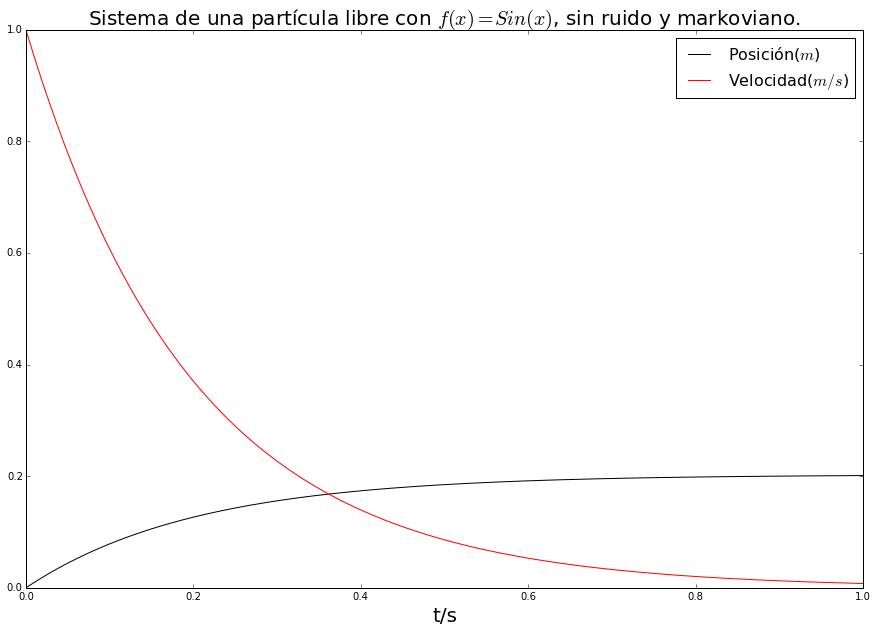

In [17]:
%matplotlib inline
alpha = 5. # Constante requerida para solucionar la ec. diferencial. Físicamente juega el papel del amortiguamiento
           # del sistema.
times=np.linspace(0,1.,1000000)
def f(Y,t):
    return np.array([Y[1],-alpha*(np.cos(Y[0])**2)*Y[1]]) # Función que devuelve la derivada del vector Y = [x,v].


funsol,others=odeint(f,[0.,1.],times,full_output=True) # Solución de a ecuación diferencial usando odeint con 
                                                       # consiciones iniciales x0 = 0 m y v0 = 1 m/s.

# Gráfica del vector solución.
plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición($m$)')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad($m/s$)')
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, sin ruido y markoviano.',fontsize=20)
plt.savefig('1')
plt.show()

In [22]:
# Animación de los resultados mostrados previemente.
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,1.,1000000)
pos, = plt.plot([],[],'k',label=u'Posición($m$)')
vel, = plt.plot([],[],'r',label=u'Velocidad($m/s$)')
plt.xlim(0.,1.)

alphas = np.arange(-15.,16.)
def animate(i):
    def f(Y,t):
        return np.array([Y[1],-alphas[i]*(np.cos(Y[0])**2)*Y[1]]) 
    funsol,others=odeint(f,[0.,1.],times,full_output=True)
    pos.set_data(times,funsol[:,0])
    vel.set_data(times,funsol[:,1])
    plt.ylim(0.,max(funsol[:,1])+0.1)
    return pos,vel

anim = animation.FuncAnimation(fig,animate,30,interval=100,blit=False,repeat_delay=1000)
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, sin ruido y markoviano.',fontsize=20)
plt.tight_layout()
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)
anim.save(u'1_video.mp4',writer=writer)
#plt.show()

Using matplotlib backend: Qt4Agg


EL segundo sistema abordado es análogo al anterior pero se considera ls función de acople $f(x) = x^{2}$. A simple vista, los resultados para la posición no cambian mucho, no obstante, la velocidad cambia radicalmente.

La ecuación de movimiento es ahora:

$$
m\ddot x + 4m\alpha x^2 \dot x = 0
$$

Y despejando para la aceleración:

$$
\ddot x = -2\alpha x^2 \dot x
$$

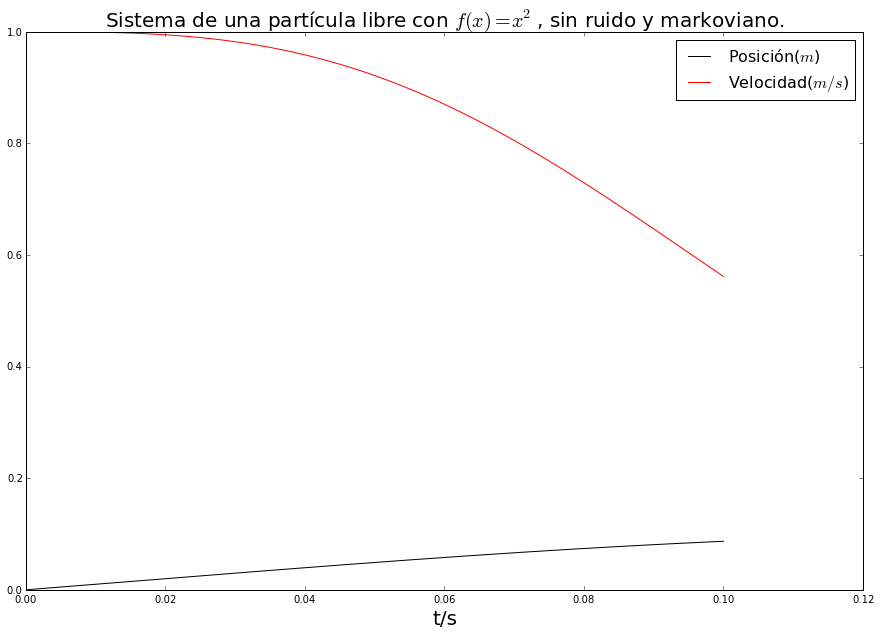

In [11]:
%matplotlib inline
alpha = 500. # Se aumenta considerablemente este valor para apreciar mejores resultados gráficos.
def f(Y,t):
    return np.array([Y[1],-4*alpha*(Y[0]**2)*Y[1]]) # La definición de la función y la solución de la ecuación 
                                               # diferencial es análoga a lo hecho previamente.

times=np.linspace(0,.1,10000)
funsol,others=odeint(f,[0.,1.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición($m$)')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad($m/s$)')
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = x^2$, sin ruido y markoviano.',fontsize=20)
plt.show()

In [4]:
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,.1,10000)
pos, = plt.plot([],[],'k',label=u'Posición($m$)')
vel, = plt.plot([],[],'r',label=u'Velocidad($m/s$)')
plt.xlim(0.,.1)

alphas = np.arange(-100.,200.)
def animate(i):
    def f(Y,t):
        return np.array([Y[1],-4*alphas[i]*(Y[0]**2)*Y[1]]) 
    funsol,others=odeint(f,[0.,1.],times,full_output=True)
    pos.set_data(times,funsol[:,0])
    vel.set_data(times,funsol[:,1])
    plt.ylim(0.,max(funsol[:,1])+0.01)
    return pos,

anim = animation.FuncAnimation(fig,animate,np.arange(0,300,2),interval=10,blit=False,repeat_delay=1000)
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = x^2$, sin ruido y markoviano.',fontsize=20)
plt.tight_layout()
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
anim.save(u'2_video.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


Para un sistema de una partícula libre con función de acople $f(x) = Sin(x)$, ruido $\xi (t)= Cos(t)$ y markoviano, la ecuación de movimiento es:

$$
\large
m\ddot x + m\alpha cos(x)\dot x = Fcos(x)cos(t)
$$

Donde F es una constante que permite ajustar las unidades. Al despejar nuevamente para la aceleración se obtiene:

$$
\large
\ddot x = -\alpha cos(x)\dot x + \frac{F}{m}cos(x)cos(t)
$$

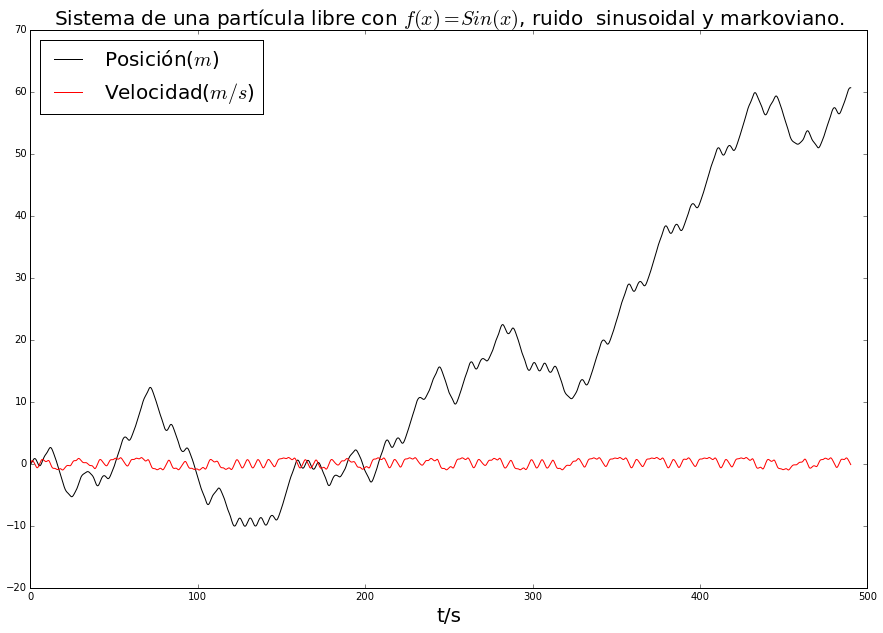

In [18]:
%matplotlib inline
mass = 1.
alpha = 1.
# Tambien se asume F = 1. para la solución de la ecuación diferencial puesto que ya se dijo que simplemente 
# ayuda a que el lado derecho de la ecuaación tenga las unidades correctas.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.cos(t)]) 

times=np.linspace(0,490.,1000000)
funsol,others=odeint(f,[0.,0.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición($m$)')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad($m/s$)')
plt.legend(loc='best',fontsize=20)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido  sinusoidal y markoviano.',fontsize=20)
plt.savefig('2')
plt.show()

In [13]:
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,50.,100000)
mass = 1.
pos, = plt.plot([],[],'k',label=u'Posición($m$)')
#vel, = plt.plot([],[],'r',label=u'Velocidad($m/s$)')
plt.xlim(0.,50.)

alphas = np.linspace(-15.,10.,100)
def animate(i):
    def f(Y,t):
        return np.array([Y[1],-alphas[i]*(np.cos(Y[0])**2)*Y[1] + (1./mass)*np.cos(Y[0])*np.cos(t)]) 
    funsol,others=odeint(f,[0.,0.],times,full_output=True)
    pos.set_data(times,funsol[:,0])
    #vel.set_data(times,funsol[:,1])
    plt.ylim(min(funsol[:,0])-0.1,max(funsol[:,0])+0.1)
    return pos

anim = animation.FuncAnimation(fig,animate,np.arange(0,100,2),interval=500,blit=False,repeat_delay=1000)
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido sinusoidal y markoviano.',fontsize=20)
plt.tight_layout()
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
anim.save(u'3_video.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


Al cambiar el ruido por $\xi (t) = Sin(t)$, la aceleración se convierte en:

$$
\large
\ddot x = -\alpha cos(x)\dot x + \frac{F}{m}cos(x)sin(t)
$$

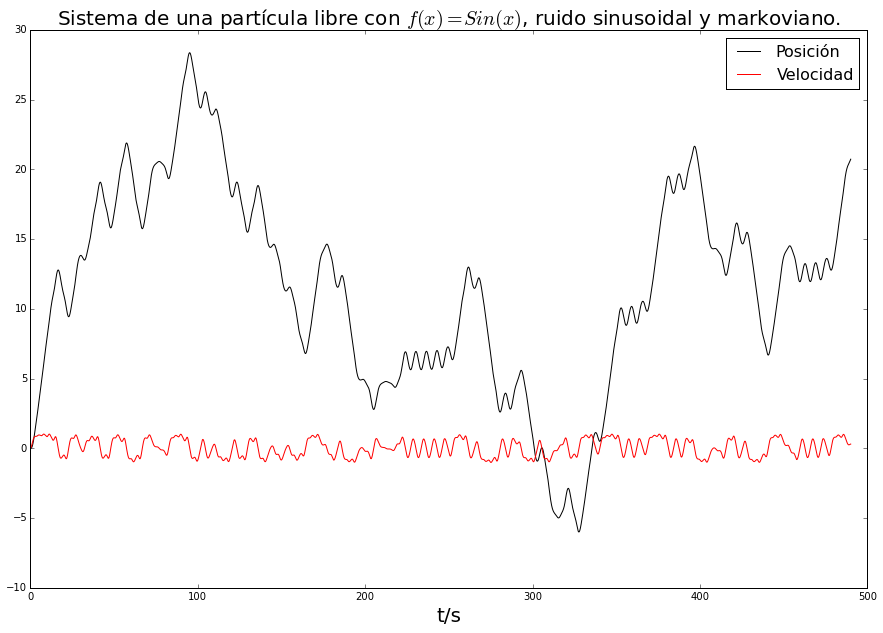

In [20]:
%matplotlib inline
mass = 1.
alpha = 1.
# Se asume nuevamente F = 1.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.sin(t)]) 

times=np.linspace(0,490.,100000)
funsol,others=odeint(f,[0.,0.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido sinusoidal y markoviano.',fontsize=20)
plt.savefig('3')
plt.show()

In [14]:
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,50.,100000)
mass = 0.1
pos, = plt.plot([],[],'k',label=u'Posición($m$)')
#vel, = plt.plot([],[],'r',label=u'Velocidad($m/s$)')
plt.xlim(0.,50.)

alphas = np.linspace(-15.,15.,100)
def animate(i):
    def f(Y,t):
        return np.array([Y[1],-alphas[i]*np.cos(Y[0])*Y[1] + (1./mass)*np.cos(Y[0])*np.sin(t)]) 
    funsol,others=odeint(f,[0.,0.],times,full_output=True)
    pos.set_data(times,funsol[:,0])
    #vel.set_data(times,funsol[:,1])
    plt.ylim(min(funsol[:,0])-0.1,max(funsol[:,0])+0.1)
    return pos

anim = animation.FuncAnimation(fig,animate,np.arange(0,100,2),interval=500,blit=False,repeat_delay=1000)
plt.legend(loc='best',fontsize=16)
plt.xlabel(u't/s',fontsize=20)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido sinusoidal y markoviano.',fontsize=20)
plt.tight_layout()
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
anim.save(u'4_video.mp4',writer=writer)
plt.show()

Using matplotlib backend: Qt4Agg


Cambiando ahora a ruido exponencial creciente $\xi (t) = Fe^{t}$, la aceleración es.

$$
\large
\ddot x = -\alpha cos(x)\dot x + \frac{F}{m}cos(x)e^{t}
$$

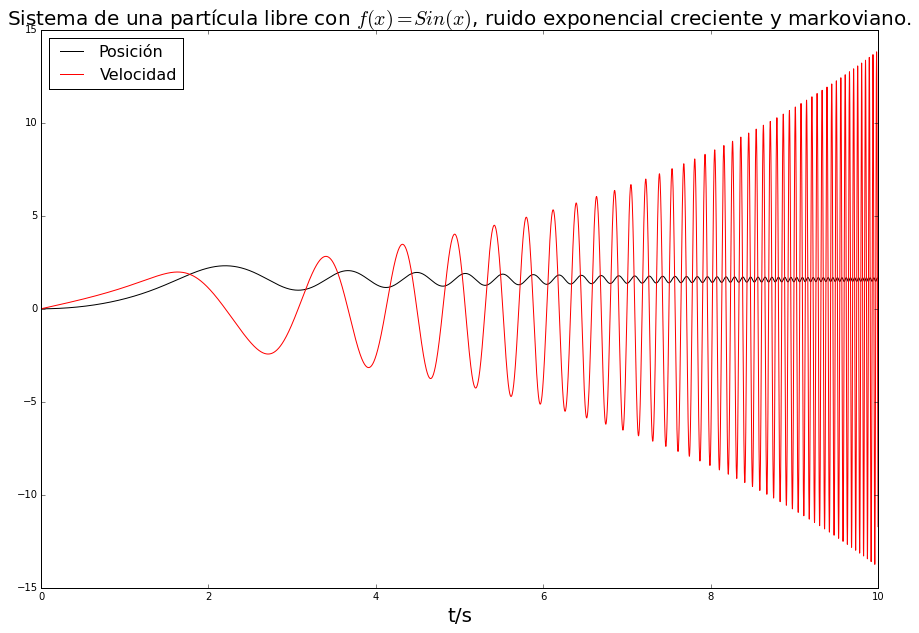

In [21]:
%matplotlib inline
mass = 1.
alpha = 1.
# Siempre se asume F = 1.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.exp(t)]) 

times=np.linspace(0,10.,100000)
funsol,others=odeint(f,[0.,0.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, ruido exponencial creciente y markoviano.',
          fontsize=20)
plt.savefig('4')
plt.show()

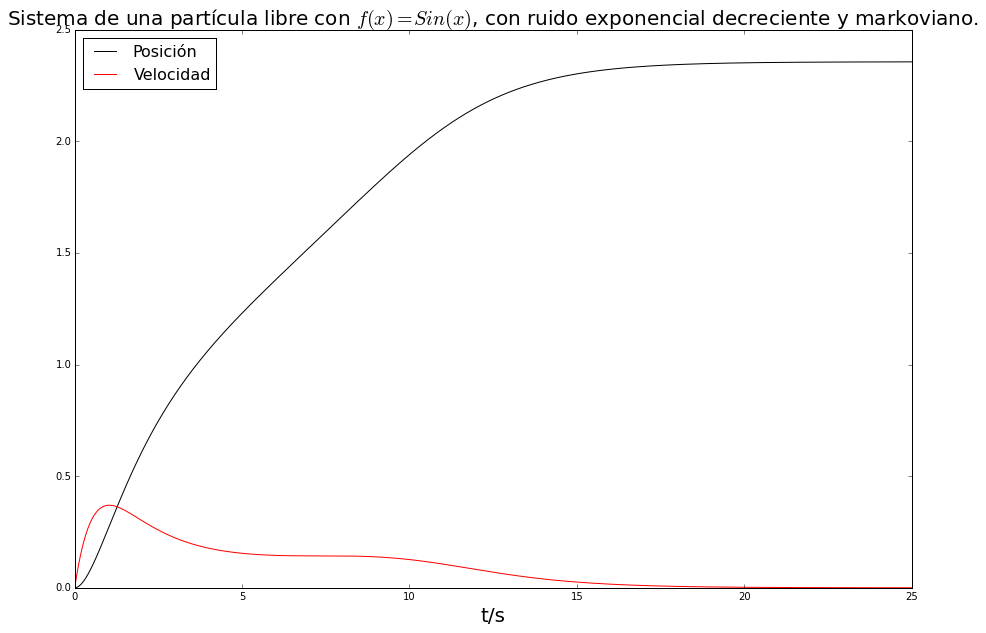

In [23]:
%matplotlib inline
mass = 1.
alpha = 1.
def f(Y,t):
    return np.array([Y[1],-alpha*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.exp(-t)]) 

times=np.linspace(0,25.,100000)
funsol,others=odeint(f,[0.,0.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol[:,0],'k',label=u'Posición')
plt.plot(times,funsol[:,1],'r',label=u'Velocidad')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Sistema de una partícula libre con $f(x) = Sin(x)$, con ruido exponencial decreciente y markoviano.',
          fontsize=20)
plt.savefig('5')
plt.show()

Using matplotlib backend: Qt4Agg


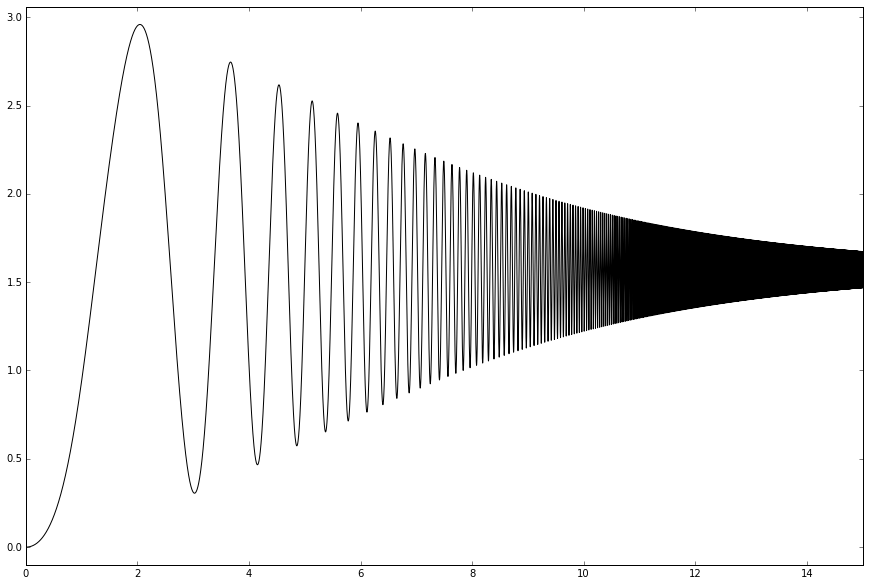

In [24]:
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,15.,100000)
mass = 1.
pos, = plt.plot([],[],'k')
#vel, = plt.plot([],[],'b')
plt.xlim(0.,15.)

alphas = np.linspace(-1.,1.,100)
def animate(i):
    def f(Y,t):
        return np.array([Y[1],-alphas[i]*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.exp(t)]) 
    funsol,others=odeint(f,[0.,0.],times,full_output=True)
    pos.set_data(times,funsol[:,0])
    #vel.set_data(times,funsol[:,1])
    plt.ylim(min(funsol[:,0])-0.1,max(funsol[:,0])+0.1)
    return pos

anim = animation.FuncAnimation(fig,animate,np.arange(0,100,10),interval=1,blit=False,repeat_delay=1000)
plt.show()

Ahora bien, para un sistema conformado por un oscilador armónico con $f(x) = Sin(x)$, ruido exponencial decreciente y markoviano, la ecuación de movimiento es:

$$
\large
m\ddot x + m\omega ^2 x + m\alpha cos(x)\dot x = Fcos(x)e^{-t}
$$

Y despejando para la aceleración se tiene que:

$$
\large
\ddot x = -\omega ^2 x - \alpha cos(x)\dot x + \frac{F}{m}cos(x)e^{-t}
$$

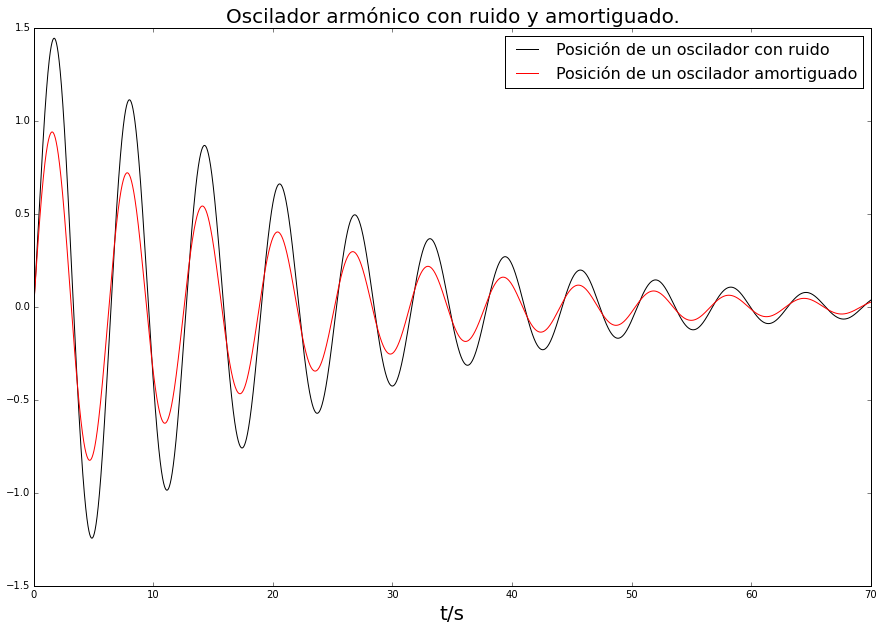

In [26]:
%matplotlib inline
mass = 1.
omega = 1.
alpha = .1
def f1(Y,t):
    return np.array([Y[1],-(omega**2)*Y[0] - alpha*(np.cos(Y[0])**2)*Y[1] + (1/mass)*np.cos(Y[0])*np.exp(-t)]) 

def f2(Y,t):
    return np.array([Y[1],-(omega**2)*Y[0] - alpha*(np.cos(Y[0])**2)*Y[1]]) 

times=np.linspace(0,70.,100000)
funsol1,others1=odeint(f1,[0.,1.],times,full_output=True)
funsol2,others2=odeint(f2,[0.,1.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol1[:,0],'k',label=u'Posición de un oscilador con ruido')
plt.plot(times,funsol2[:,0],'r',label=u'Posición de un oscilador amortiguado')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Oscilador armónico con ruido y amortiguado.',fontsize=20)
plt.savefig('6')
plt.show()

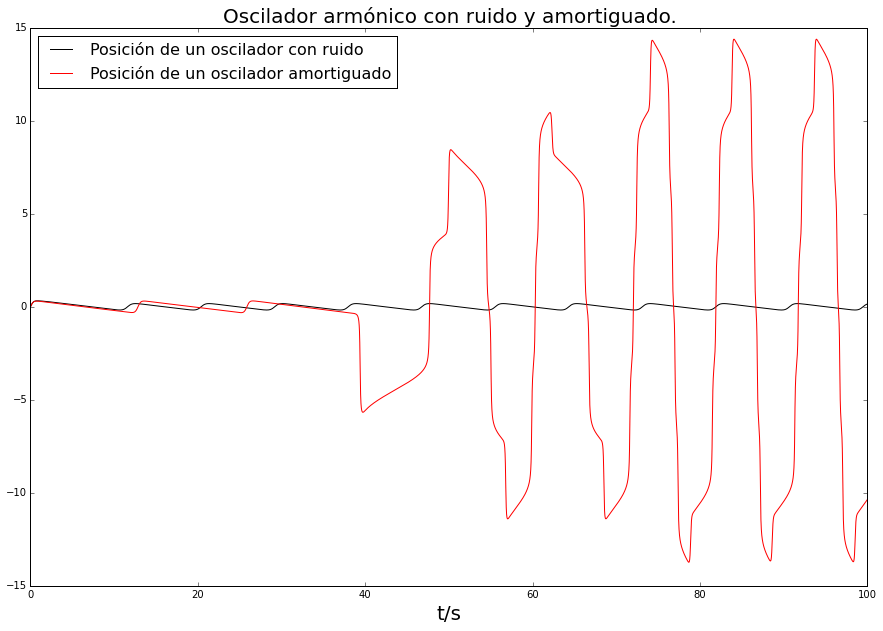

In [8]:
%matplotlib inline
mass = 1.
omega = 1.
alpha = 18.
def f1(Y,t):
    return np.array([Y[1],-(omega**2)*Y[0] - alpha*np.sin(Y[0])*Y[1] + (1/mass)*np.sin(Y[0])*np.exp(-t)]) 

def f2(Y,t):
    return np.array([Y[1],-(omega**2)*Y[0] - alpha*np.sin(Y[0])*Y[1]]) 

times=np.linspace(0,100.,100000)
funsol1,others1=odeint(f1,[0.,1.],times,full_output=True)
funsol2,others2=odeint(f2,[0.,1.],times,full_output=True)

plt.figure(figsize=(15,10))
plt.plot(times,funsol1[:,0],'k',label=u'Posición de un oscilador con ruido')
plt.plot(times,funsol2[:,0],'r',label=u'Posición de un oscilador amortiguado')
plt.xlabel(u't/s',fontsize=20)
plt.legend(loc='best',fontsize=16)
plt.title(u'Oscilador armónico con ruido y amortiguado.',fontsize=20)
plt.savefig('6')
plt.show()

In [9]:
%matplotlib
fig = plt.figure(figsize=(15,10))
times=np.linspace(0,15.,100000)
mass = 1.
omega = 1.
pos, = plt.plot([],[],'k')
vel, = plt.plot([],[],'b')
plt.xlim(0.,15.)

alphas = np.linspace(-.4,.4,100)
def animate(i):
    def f1(Y,t):
        return np.array([Y[1],-alphas[i]*np.cos(Y[0])*Y[1] - (omega**2)*Y[0] + (1./mass)*np.cos(Y[0])*np.exp(t)]) 

    def f2(Y,t):
        return np.array([Y[1],-alphas[i]*Y[1] - (omega**2)*Y[0] + (1./mass)*np.cos(Y[0])*np.exp(t)]) 

    funsol1,others1=odeint(f1,[0.,1.],times,full_output=True)
    funsol2,others2=odeint(f2,[0.,1.],times,full_output=True)
    pos.set_data(times,funsol1[:,0])
    vel.set_data(times,funsol2[:,0])
    plt.ylim(min(funsol2[:,0])-0.1,max(funsol2[:,0])+0.1)
    return pos,vel

anim = animation.FuncAnimation(fig,animate,100,interval=1,blit=False,repeat_delay=1000)
plt.show()

Using matplotlib backend: Qt4Agg
